# Name : Jabed Umar 
# Roll no : 2011072

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Library.End import*
# from Library.Lin_alg import*
from tqdm import trange

# Q.1

In [2]:
import numpy as np
from scipy.optimize import curve_fit

# Load data from file
data = np.loadtxt('endsemfit.txt')

# Extract time, natural log of counts, and uncertainties
time = data[:, 0]
ln_counts = np.log(data[:, 1])
sigma_ln_counts = 1 / np.sqrt(data[:, 1])

# Define the linear function for decay
def decay_function(t, decay_constant, intercept):
    return decay_constant * t + intercept

# Perform curve fitting using scipy.optimize.curve_fit
popt, pcov = curve_fit(decay_function, time, ln_counts, sigma=sigma_ln_counts)

# Extract decay constant and intercept
decay_constant, intercept = popt
decay_constant_error = np.sqrt(np.diag(pcov))[0]

# Calculate chi-squared value
chi_squared = np.sum(((ln_counts - decay_function(time, decay_constant, intercept)) / sigma_ln_counts)**2)

# Degrees of freedom
degrees_of_freedom = len(time) - 2  # Two parameters in the linear regression

# Critical chi-squared value at 5% significance level
critical_chi_squared = np.percentile(
    np.random.chisquare(df=degrees_of_freedom, size=100000), 95
)

# Compare chi-squared value with critical value
fit_acceptable = chi_squared < critical_chi_squared

print(f"Decay constant: {decay_constant} ± {decay_constant_error}")
print(f"Chi-squared value: {chi_squared}")
print(f"Critical chi-squared value: {critical_chi_squared}")
print(f"Fit acceptable at 5% significance level: {fit_acceptable}")

Decay constant: -0.00908776483462688 ± 0.001400752632869854
Chi-squared value: 15.372761711005207
Critical chi-squared value: 15.50168324144394
Fit acceptable at 5% significance level: True


# Q.2

In [3]:
#defining the trancted number function
def truncated_number(x, n):
    return int(x*10**n)/10**n

In [4]:
#defining the van der waals equation
def van_der_waals(x):
    return 5.95*x**3 - (5.95*0.05422 + 0.0821*300)*x**2 + 6.254*x - 6.254*0.05422

In [5]:
# R = RootFindings(van_der_waals, 0, 0.18, 0.00001,1000)
# #find the interval of the root
# R.bracket(5,1.5)

In [6]:
P = 5.95
a = 6.254
b = 0.05422
R = 0.0821
T = 300
#define the functions
f1 = lambda x: R*T/(P + a/x**2) + b
f2 = lambda x: np.sqrt(a*(x-b)/(R*T - P*(x-b)))

#compute the fixed point iteration
root1 = fixed_point_iteration(f1, 0.1, max_it=100, tolerance=1e-5)
print("The root of the first function is: ", truncated_number(root1, 5))
print()
root2 = fixed_point_iteration(f2, 0.5, max_it=100, tolerance=1e-5)
print("The root of the second function is: ", truncated_number(root2, 5))

The root of the first function is:  0.07811

The root of the second function is:  0.18568


# Q.5

In [7]:
# Given matrix 
A = np.loadtxt("endsemmat.txt")
num_iterations = 100
eigenvalues = []
eigenvectors = []

#2 largest eigenvalues using power iteration
for _ in range(2):
    eigenvalue, eigenvector = Power_iteration(A, num_iterations)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)
    A = A - eigenvalue * np.outer(eigenvector, eigenvector)

print("Eigenvalues:", eigenvalues)

Eigenvalues: [3.732050807568877, 3.0]


In [8]:
# eigenvectors of the corresponding eigenvalues
for i, eigenvector in enumerate(eigenvectors):
    print(f"Eigenvector {i+1}:", eigenvector)

Eigenvector 1: [-0.28867513  0.5        -0.57735027  0.5        -0.28867514]
Eigenvector 2: [ 5.00000000e-01 -5.00000001e-01  9.53210439e-10  4.99999999e-01
 -5.00000000e-01]


In [9]:
# Verify the given eigenvalues
a, b, c, n = -1, 2, -1, 5
L_1 = b + 2*np.sqrt(a*c)*np.cos(np.pi*1/(n+1))
L_2 = b + 2*np.sqrt(a*c)*np.cos(np.pi*2/(n+1))
print("The eigenvalues are: ", np.array([L_1, L_2]))

The eigenvalues are:  [3.73205081 3.        ]


In [10]:
#verify the given eigenvectors
v_1 = np.array([2*np.sqrt(c/a)*np.sin(np.pi*i/(n+1)) for i in range(1,n+1)])
#normalize the eigenvector v1
v_1 = v_1/np.linalg.norm(v_1)
v_2 = np.array([2*np.sqrt(c/a)**2*np.sin(2*np.pi*i/(n+1)) for i in range(1,n+1)])
#normalize the eigenvector v1
v_2 = v_2/np.linalg.norm(v_2)
print("The eigenvectors are: ", np.array([v_1, v_2]))

The eigenvectors are:  [[ 2.88675135e-01  5.00000000e-01  5.77350269e-01  5.00000000e-01
   2.88675135e-01]
 [ 5.00000000e-01  5.00000000e-01  7.07050159e-17 -5.00000000e-01
  -5.00000000e-01]]


# Q.6

Acceptance rate: 81.38%


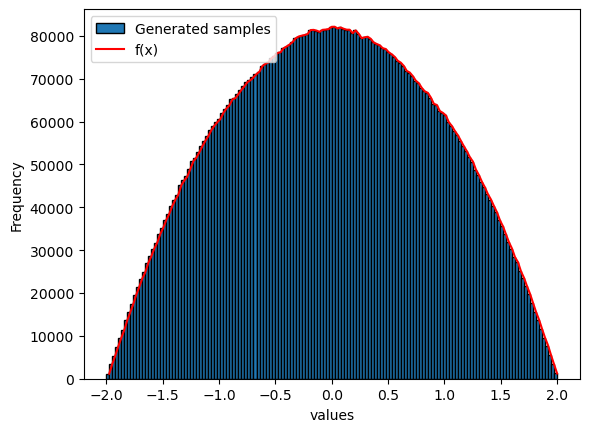

In [11]:
#The no of points
N = int(1e7)
a = 2
#standard deviation of g(x) distribution
g_std = 1.3
# define the functions
f = lambda x: 0.5 * (a**2 - x**2)
g = lambda x: np.exp(-x**2/(2*g_std**2)) * 0.5 * a**2
#scaling factor is there to make g(x) more than f(x) for all x

np.random.seed(15)  #choosing a seed
u = np.random.randn(N)*g_std  # generate N samples from g(x)
p = np.random.rand(N) # generate N samples from uniform distribution

#check if the samples are accepted or rejected
x = u[p < f(u)/g(u)] 

n = len(x)  # count accepted samples

print(f"Acceptance rate: {n*100/N:.2f}%")

a = plt.hist(x, bins=150,  edgecolor="k",label='Generated samples')
plt.plot(a[1][1:], a[0], 'r', label='f(x)')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.legend()

# Q.7

Text(0, 0.5, 'Energy')

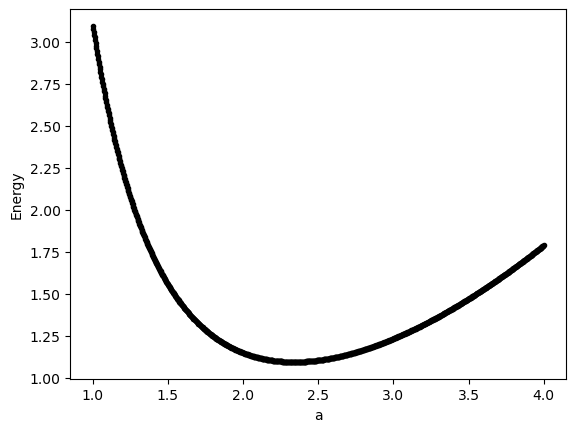

In [12]:
# variational method to solve the Harmonic Oscillator
# set the sampiling points
num_samples = int(1e5)

#set the values of alpha (a)
alphas = np.linspace(1, 4, 1000)
#initialize the array to store the energy values
ys = np.zeros_like(alphas)

#compute the energy values for each alpha
for i, alpha in enumerate(alphas):
    rands = get_rng_random(alpha, num_samples)
    eps = lambda x: 0.5*x**2 + 2/(alpha**2-x**2)
    integral = np.mean(eps(rands))
    ys[i] = integral

plt.plot(alphas, ys, ".-", color="black")
plt.xlabel('a') 
plt.ylabel('Energy')

In [13]:
optimal_alpha = np.argmin(ys)
print(f"Optimal a is : {alphas[optimal_alpha]:.4f}")
print(f"Minimum energy is: {ys[optimal_alpha]:.4f}")

Optimal a is : 2.3393
Minimum energy is: 1.0950


# <h4> We know that the ground state energy of the Harmonic Oscillator is 0.5 (in atomic unit). But we are getting 1.1146. This is because we are using the variational method to compute the energy and the trial wave function we are using is not the exact wave function. The exact wave function is a Gaussian type function (hermite polynomial). We can improve our result by using a Gaussian type trial wave function. </h4>